In [1]:
import sys

In [2]:
from math import nan
from pathlib import Path
from analysis.wandb_utils import Metrics, load_data, plot, simple_concat, Aggregation
from analysis.wandb_downloader import RunsDownloader
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Path(".").resolve()

PosixPath('/Users/mb715/Code/fair-dist-matching/analysis/neurips21/celeba')

In [4]:
results_dir = Path("../../../results/celeba/no_unsmiling_females/")

# Still need to run ERM for the other missing quadrants
# data = load_data(
# #     results_dir / "ours_no_balancing.csv",
# #     results_dir / "ours_perfect_balancing.csv",
#     results_dir / "celeba_baseline_cnn_Male_Smiling_40epochs.csv",
# #     results_dir /
# )
data = pd.DataFrame()

In [16]:
wandb = RunsDownloader(project="suds")
# data_ = wandb.groups(
#     "celeba.SupportMatching.balanced-with-clustering.new_ae_arch_more_iters_hierarchical_clustering.no_smiling_females",
#     "celeba.SupportMatching.balanced-True.new_ae_arch_more_iters.no_smiling_females",
#     "celeba.SupportMatching.balanced-False.new_ae_arch_more_iters.no_smiling_females",
# )
data_ =  wandb.groups("celeba.SupportMatching.balanced-True.new_ae_arch_more_iters.no_unsmiling_females")
data = simple_concat(data, data_)

data_ =  wandb.groups("celeba.SupportMatching.balanced-False.new_ae_arch_more_iters.no_unsmiling_females")
data = simple_concat(data, data_)

data_ =  wandb.groups("celeba.SupportMatching.balanced-with-clustering.new_ae_arch_more_iters_hierarchical_clustering.no_unsmiling_females")
data = simple_concat(data, data_)

data = simple_concat(data, data_)
data_ =  wandb.groups("celeba.gdro.context_mode=ContextMode.unlabelled..gdro_tests.no_unsmiling_females").iloc[:5]
data_["misc.log_method"] = "gDRO"
data = simple_concat(data, data_)

# ------------------
data_ =  wandb.groups("celeba.gdro.context_mode_ground_truth.oracle_gdro.celeba_gdro.no_unsmiling_females")
data = simple_concat(data, data_)

data_ =  wandb.groups("celeba.gdro.context_mode_cluster_labels.cluster_and_gdro.real_gdro.no_unsmiling_females")
data = simple_concat(data, data_)

data_ =  wandb.groups("celeba.erm.context_mode_unlabelled.erm_no_context_no_reg.no_unsmiling_females")
data = simple_concat(data, data_)


'celeba.SupportMatching.balanced-True.new_ae_arch_more_iters.no_unsmiling_females': found 5 runs.
'celeba.SupportMatching.balanced-False.new_ae_arch_more_iters.no_unsmiling_females': found 5 runs.
'celeba.SupportMatching.balanced-with-clustering.new_ae_arch_more_iters_hierarchical_clustering.no_unsmiling_females': found 5 runs.
'celeba.gdro.context_mode=ContextMode.unlabelled..gdro_tests.no_unsmiling_females': found 10 runs.
'celeba.gdro.context_mode_ground_truth.oracle_gdro.celeba_gdro.no_unsmiling_females': found 5 runs.
'celeba.gdro.context_mode_cluster_labels.cluster_and_gdro.real_gdro.no_unsmiling_females': found 5 runs.
'celeba.erm.context_mode_unlabelled.erm_no_context_no_reg.no_unsmiling_females': found 5 runs.


In [9]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 2),
    file_prefix="celeba_gender_smiling",
    sens_attr="Male",
)
plot_title = "Unsmiling females missing"

Text(0.5, 1.0, 'Unsmiling females missing')

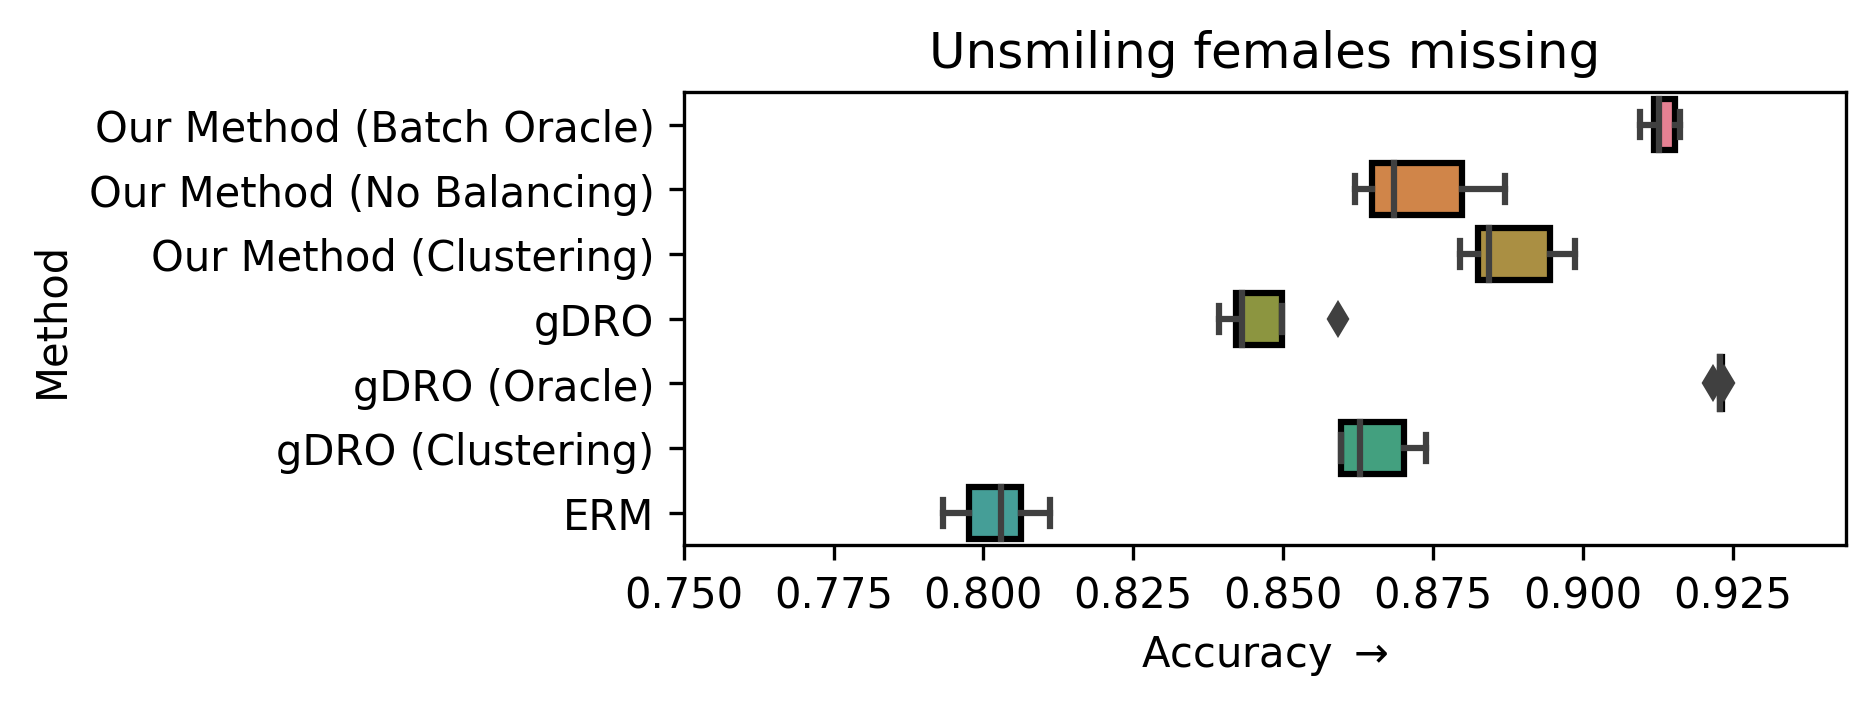

In [10]:
plot(data, metrics=[Metrics.acc], x_limits=(0.75, nan), **plot_kwargs)
plt.title(plot_title)

Text(0.5, 1.0, 'Unsmiling females missing')

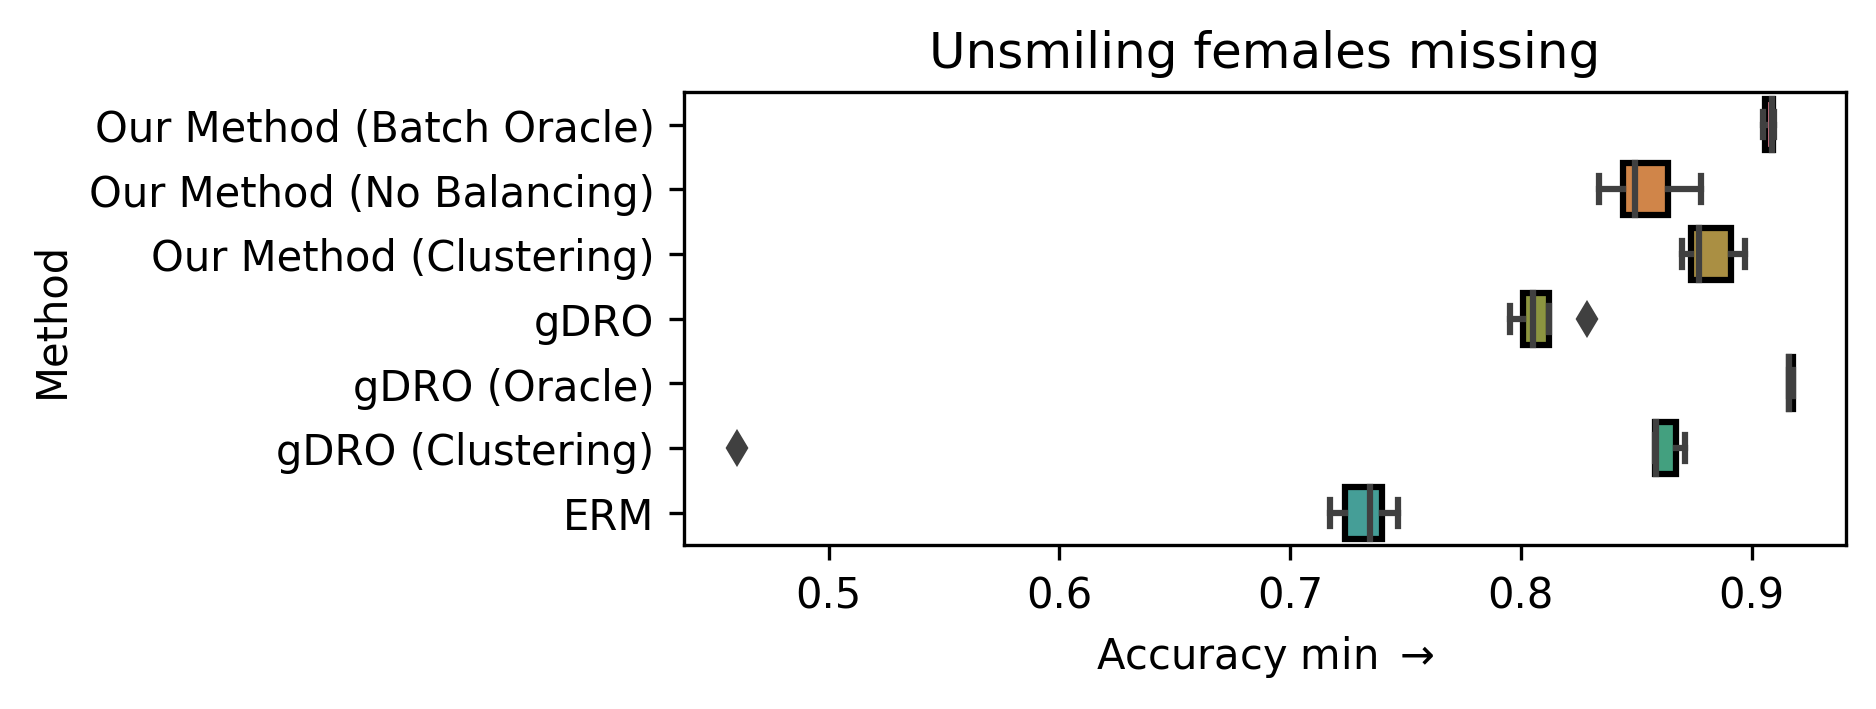

In [11]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, nan), **plot_kwargs, agg=Aggregation.min)
plt.title(plot_title)

Text(0.5, 1.0, 'Unsmiling females missing')

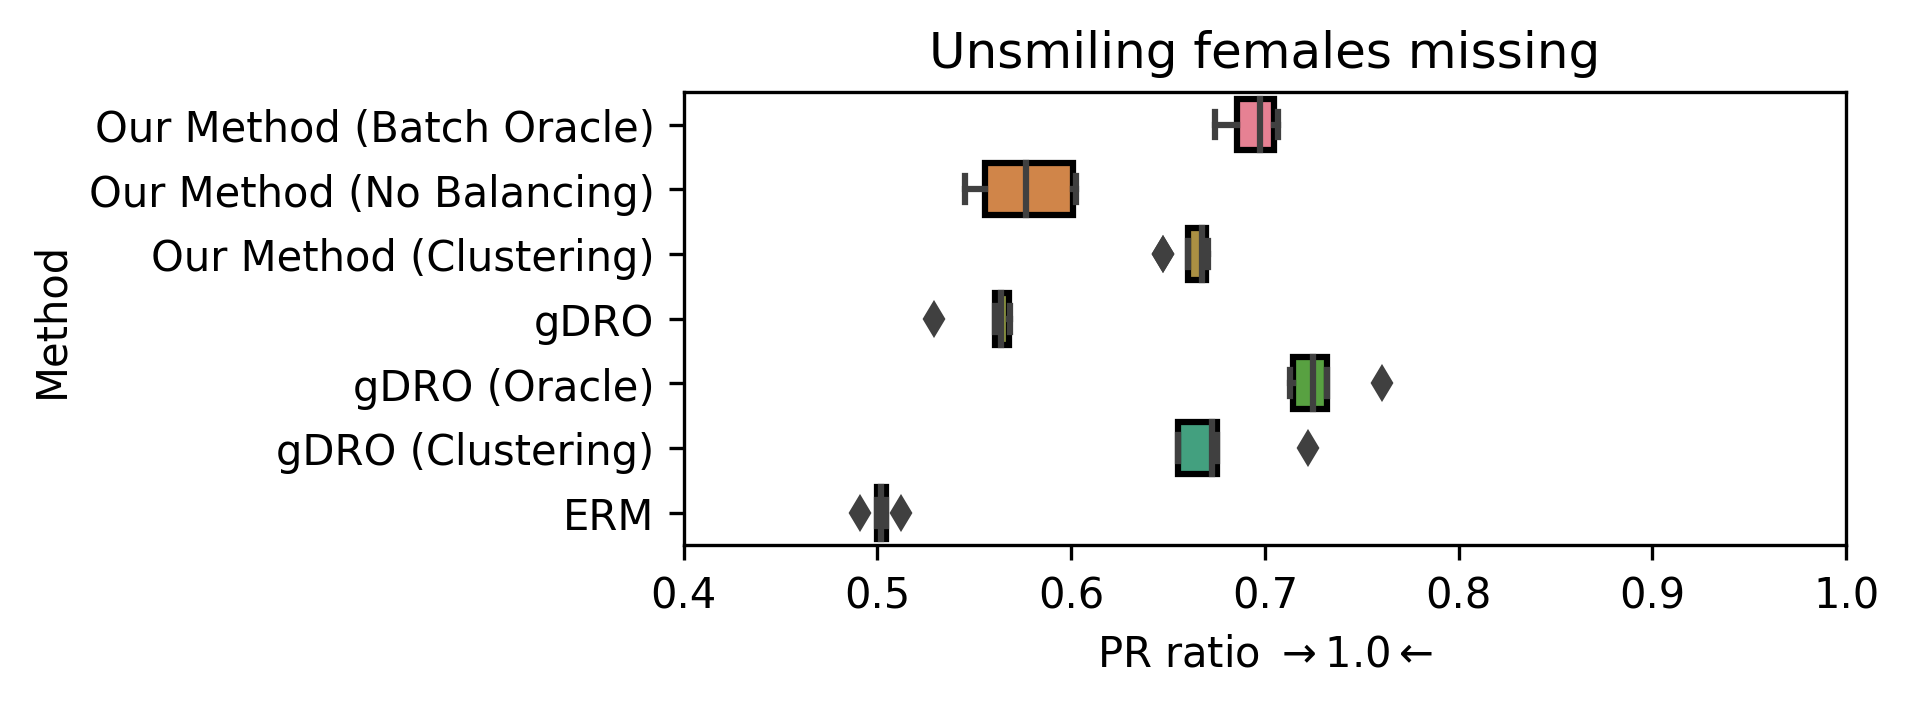

In [12]:
plot(data, metrics=[Metrics.prr], x_limits=(0.4, 1), **plot_kwargs, fillna=True)
plt.title(plot_title)

Text(0.5, 1.0, 'Unsmiling females missing')

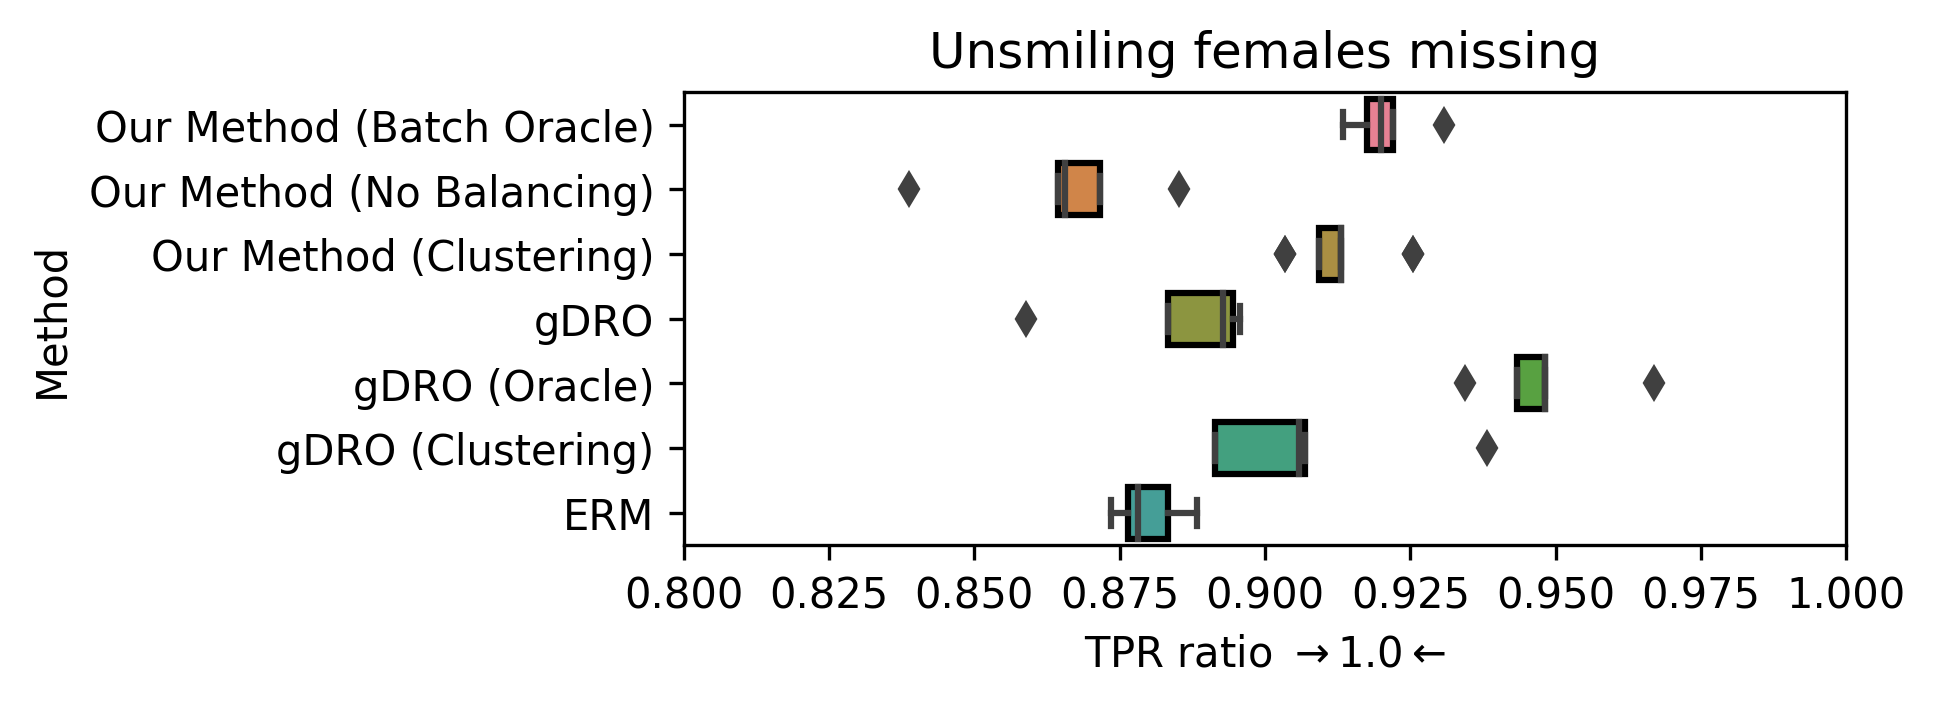

In [14]:
plot(data, metrics=[Metrics.tprr], x_limits=(0.8, 1), **plot_kwargs, fillna=True)
plt.title(plot_title)

Text(0.5, 1.0, 'Unsmiling females missing')

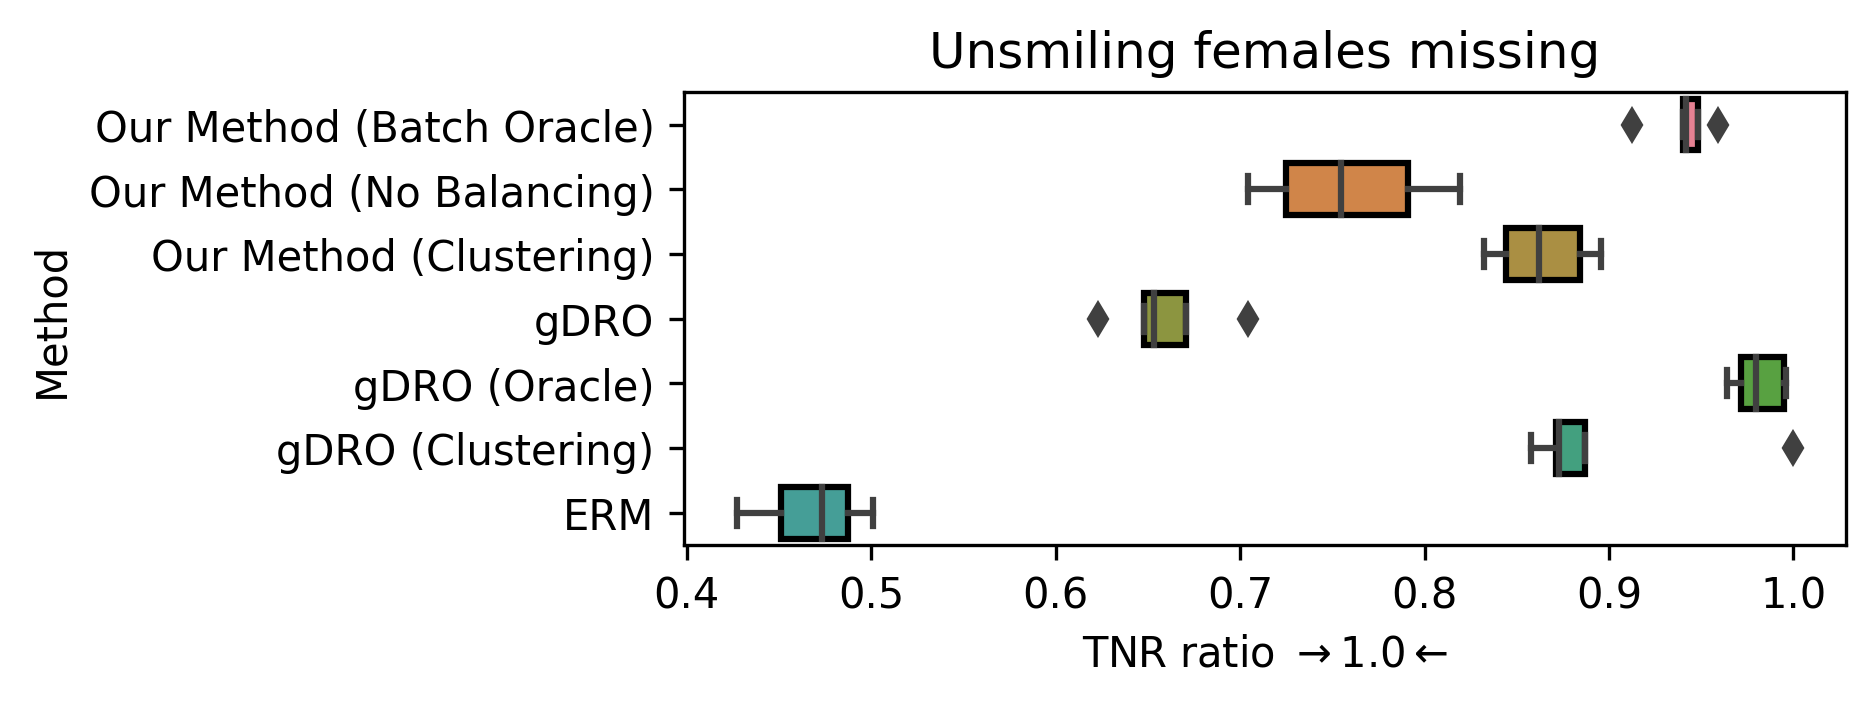

In [15]:
plot(data, metrics=[Metrics.tnrr], x_limits=(nan, nan), **plot_kwargs, fillna=True)
plt.title("Unsmiling females missing")